In [103]:
import nltk
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [69]:
# global parameters for plots
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8
def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

In [2]:
coins = pd.read_parquet("../data/coins_deities_df.parquet")

In [154]:
all_deities_list_flat = [d for dl in coins["deities"] for d in dl]
deities_top20_counts = nltk.FreqDist(all_deities_list_flat).most_common(20)
deities_top20_counts

[('Victory', 5375),
 ('Pax', 1326),
 ('Mars', 1317),
 ('Roma', 1286),
 ('Fortuna', 1110),
 ('Felicitas', 972),
 ('Providentia', 928),
 ('Concordia', 895),
 ('Salus', 839),
 ('Minerva', 832),
 ('Sol', 790),
 ('Liberalitas', 675),
 ('Aequitas', 613),
 ('Spes', 612),
 ('Hercules', 560),
 ('Pietas', 554),
 ('Fides', 534),
 ('Genius', 484),
 ('Securitas', 480),
 ('Venus', 457)]

In [155]:
deities_top20 = [tup[0] for tup in deities_top20_counts]

In [190]:
start, stop = 0, 300
diff = 20
data = []
for date in range(start, stop):
    subset = coins[coins["date_avr"].between(date-diff, date+diff)]
    if len(subset) > 0:
        deities_list_flat = [d for l in subset["deities"] for d in l]
        deities_count = len(deities_list_flat)
        deities_list_flat_top20 = [d for d in deities_list_flat if d in deities_top20]
        deities_counts = nltk.FreqDist(deities_list_flat_top20).most_common()
        #most_common_total = np.sum([tup[1] for tup in deities_counts])
        deities_counts.append(("rest",  deities_count - len(deities_list_flat_top20)))
        deities_freqs_pct = [(tup[0], np.round(tup[1] / deities_count * 100, 2)) for tup in deities_counts]
        year_data = {"date": date,
                     "n" : deities_count,
                     "counts" : deities_counts,
                     "freqs_pct" : deities_freqs_pct}
    else:
        year_data = {"date" : date,
                 "n" : 0,
                 "counts" : [],
                 "freqs_pct" : []}
    print(year_data)
    data.append(year_data)

{'date': 0, 'n': 113, 'counts': [('Victory', 45), ('Mars', 37), ('rest', 31)], 'freqs_pct': [('Victory', 39.82), ('Mars', 32.74), ('rest', 27.43)]}
{'date': 1, 'n': 113, 'counts': [('Victory', 45), ('Mars', 37), ('rest', 31)], 'freqs_pct': [('Victory', 39.82), ('Mars', 32.74), ('rest', 27.43)]}
{'date': 2, 'n': 89, 'counts': [('Victory', 39), ('Mars', 19), ('rest', 31)], 'freqs_pct': [('Victory', 43.82), ('Mars', 21.35), ('rest', 34.83)]}
{'date': 3, 'n': 55, 'counts': [('Victory', 20), ('Mars', 5), ('rest', 30)], 'freqs_pct': [('Victory', 36.36), ('Mars', 9.09), ('rest', 54.55)]}
{'date': 4, 'n': 56, 'counts': [('Victory', 22), ('Mars', 4), ('rest', 30)], 'freqs_pct': [('Victory', 39.29), ('Mars', 7.14), ('rest', 53.57)]}
{'date': 5, 'n': 50, 'counts': [('Victory', 22), ('rest', 28)], 'freqs_pct': [('Victory', 44.0), ('rest', 56.0)]}
{'date': 6, 'n': 52, 'counts': [('Victory', 24), ('rest', 28)], 'freqs_pct': [('Victory', 46.15), ('rest', 53.85)]}
{'date': 7, 'n': 46, 'counts': [('Vic

In [191]:
date_freqs_df = pd.DataFrame([dict([("date", el["date"])]  + el["freqs_pct"]) for el in data])
date_freqs_df.set_index("date", inplace=True)

In [192]:
[col for col in date_freqs_df.columns if col !="rest"] + ["rest"]

['Victory',
 'Mars',
 'Concordia',
 'Securitas',
 'Fortuna',
 'Minerva',
 'Spes',
 'Roma',
 'Genius',
 'Pax',
 'Liberalitas',
 'Salus',
 'Felicitas',
 'Aequitas',
 'Fides',
 'Pietas',
 'Venus',
 'Hercules',
 'Providentia',
 'Sol',
 'rest']

In [193]:
date_freqs_df = date_freqs_df[[col for col in date_freqs_df.columns if col !="rest"] + ["rest"]]
date_freqs_df

,Victory,Mars,Concordia,Securitas,Fortuna,Minerva,Spes,Roma,Genius,Pax,...,Salus,Felicitas,Aequitas,Fides,Pietas,Venus,Hercules,Providentia,Sol,rest
date,,,,,,,,,,,,,,,,,,,,,
0,39.82,32.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.43
1,39.82,32.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.43
2,43.82,21.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.83
3,36.36,9.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.55
4,39.29,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,17.63,6.69,3.59,2.46,1.76,0.97,1.70,3.10,0.43,11.46,...,5.23,4.50,1.03,2.68,1.00,0.88,8.91,7.81,6.99,10.88
296,17.88,6.68,3.57,2.45,1.78,0.97,1.69,3.09,0.42,11.49,...,5.20,4.48,1.03,2.66,1.00,0.88,8.86,7.74,6.99,10.83
297,18.35,6.96,3.58,2.32,1.89,1.06,1.52,2.55,0.46,11.46,...,5.23,3.97,0.83,2.58,1.09,0.96,9.71,7.06,7.19,10.90


In [194]:
date_freqs_df.fillna(0, inplace=True) #,inplace=True)

In [195]:
date_freqs_dict = date_freqs_df.to_dict("list")# ["column_dtypes]

In [196]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

Text(0, 0.5, '%')

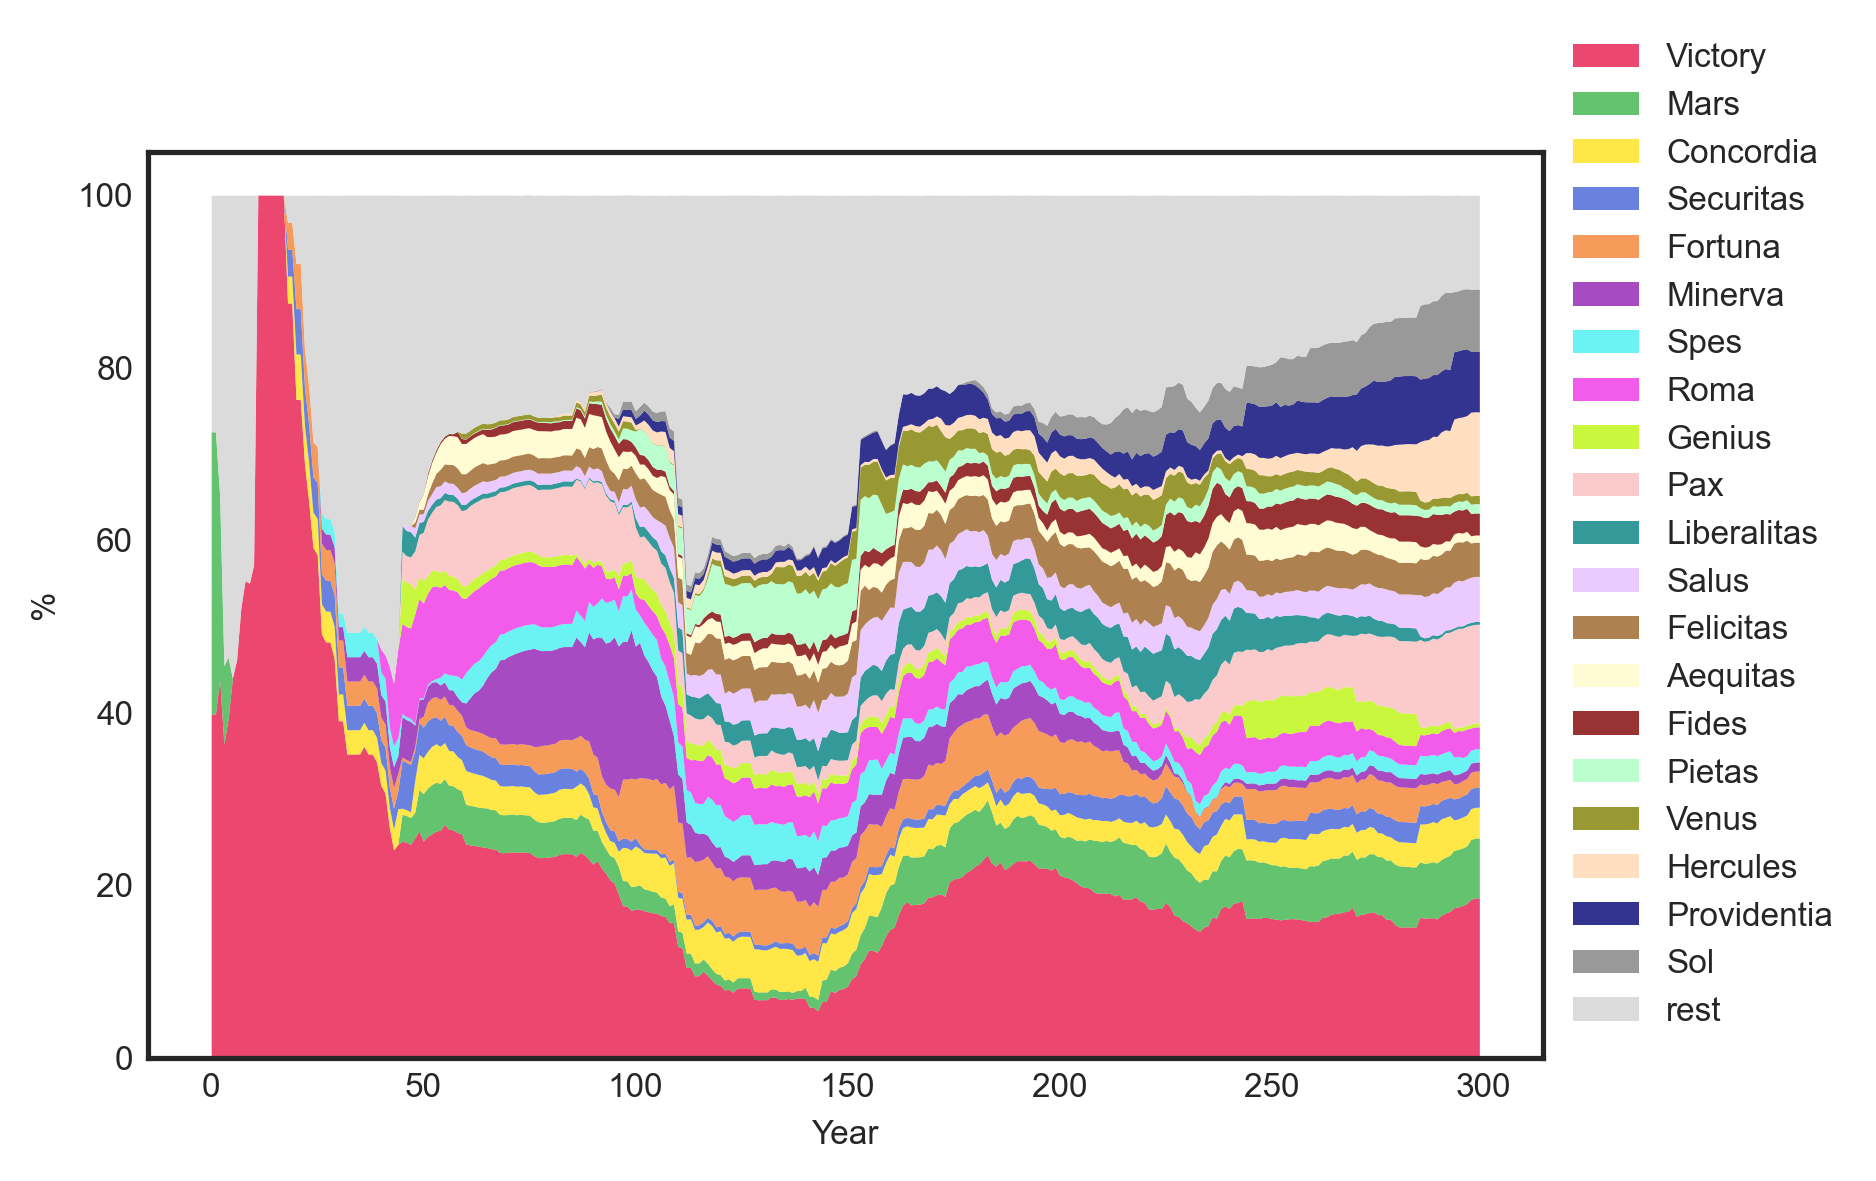

In [197]:
fig, ax = plt.subplots()
ax.stackplot(date_freqs_df.index, date_freqs_dict.values(),
             labels=date_freqs_dict.keys(), linewidth=0, colors=colors, alpha=0.8)
ax.legend(loc='lower left', bbox_to_anchor=(1,0))
ax.set_xlabel('Year')
ax.set_ylabel('%')




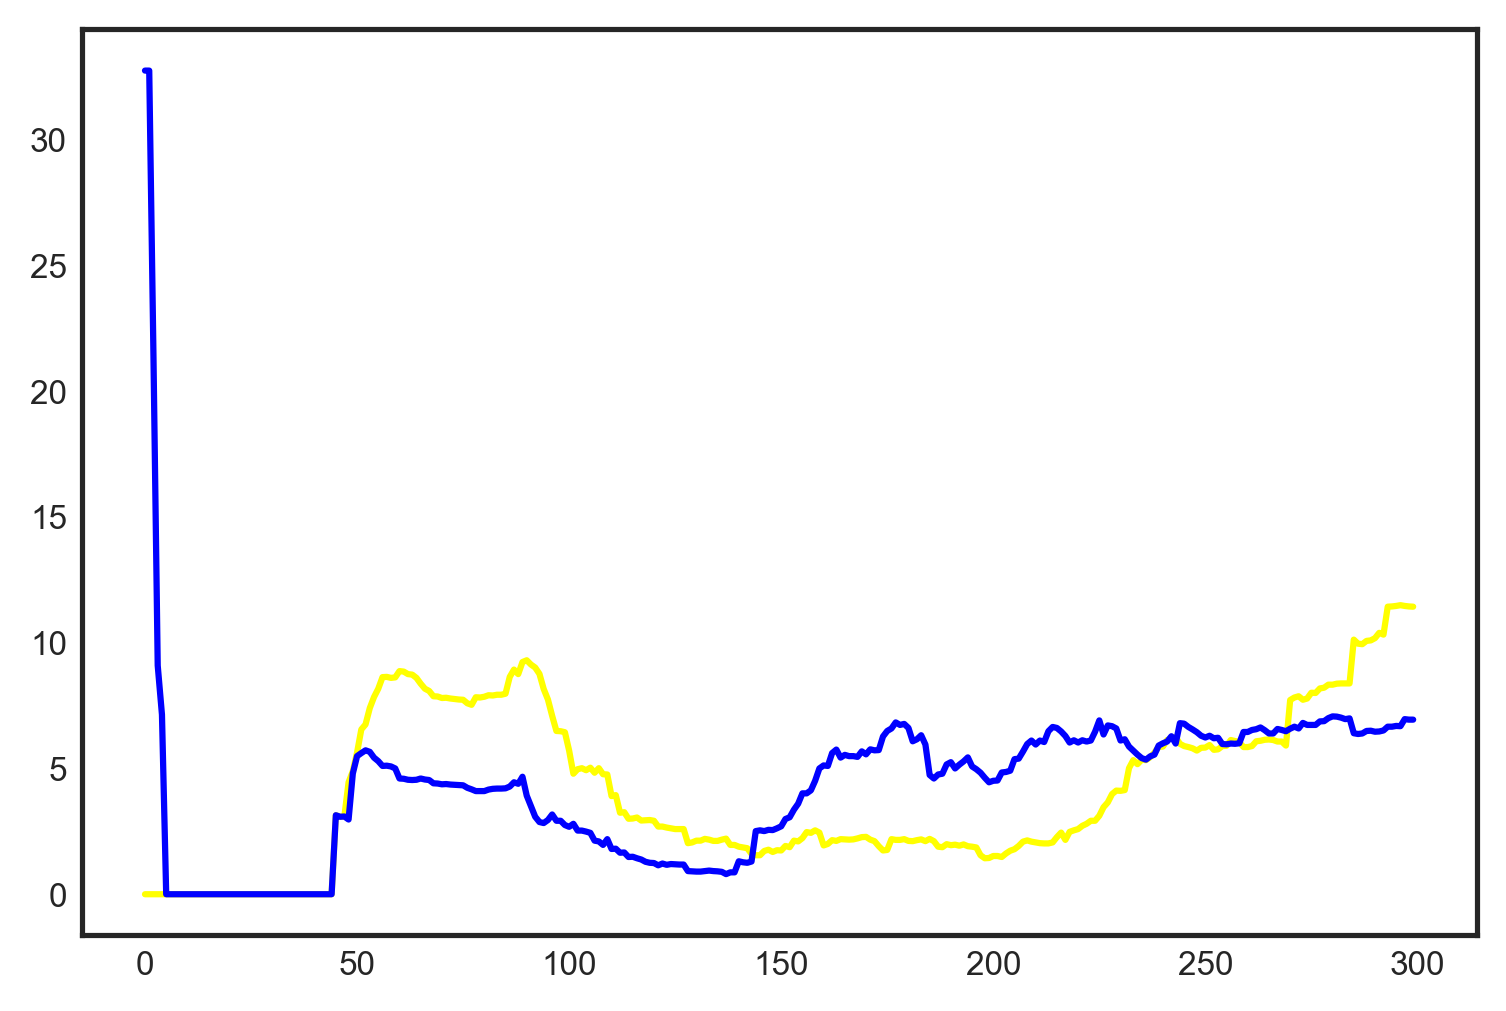

In [198]:
fig, ax = plt.subplots()
ax.plot(date_freqs_df.index, date_freqs_dict["Pax"], color="yellow")
ax.plot(date_freqs_df.index, date_freqs_dict["Mars"], color="blue")

In [ ]:
120-145 - what dominated here?